In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [2]:
stock_data=pd.read_csv('./Stock_Price_data_set.csv',index_col='Date')
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


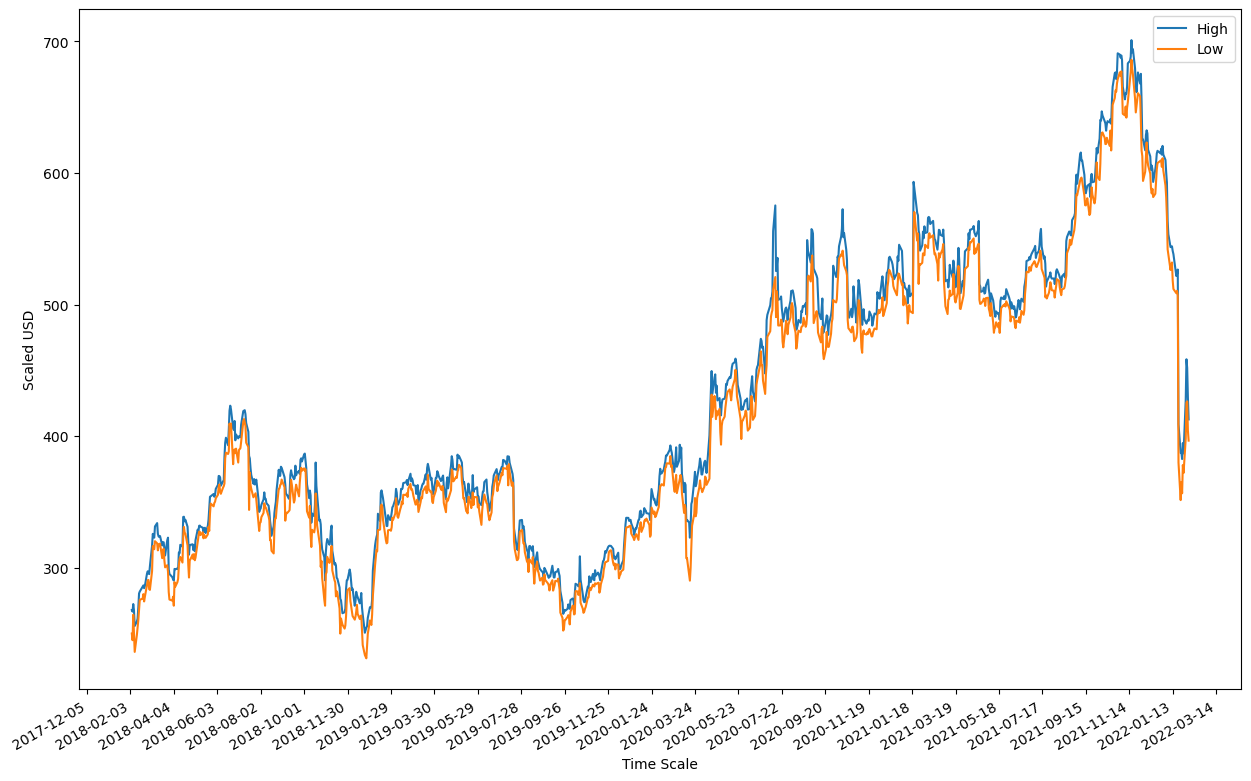

In [3]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt

plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
x_dates=[dt.datetime.strptime(d,'%Y-%m-%d').date() for d in stock_data.index.values]

plt.plot(x_dates, stock_data['High'],label='High')
plt.plot(x_dates, stock_data['Low'],label='Low')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

In [4]:
target_y=stock_data['Close']
X_feat=stock_data.iloc[:,0:3]

In [5]:
sc=StandardScaler()
X_ft=sc.fit_transform(X_feat.values)
X_ft=pd.DataFrame(columns=X_feat.columns,data=X_ft,index=X_feat.index)

In [6]:
def lstm_split(data,n_steps):
    X,y=[],[]
    for i in range(len(data)-n_steps+1):
        X.append(data[i:i+n_steps,:-1])
        y.append(data[i+n_steps-1,-1])
        
    return np.array(X),np.array(y)


In [7]:
n_steps=10
X1,y1=lstm_split(stock_data.values,n_steps=n_steps)

train_split=0.8
split_idx=int(np.ceil(len(X1)*train_split))
date_index=stock_data.index

X_train,X_test=X1[:split_idx],X1[split_idx:]
y_train,y_test=y1[:split_idx],y1[split_idx:]
X_train_date,X_test_date=date_index[:split_idx],date_index[split_idx:]
print(X1.shape,X_train.shape,X_test.shape,y_test.shape)

(1000, 10, 5) (800, 10, 5) (200, 10, 5) (200,)


In [8]:
lstm = Sequential()
lstm.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]),
              activation='relu', return_sequences=True))
lstm.add(LSTM(50, activation='relu'))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()

history = lstm.fit(X_train, y_train, epochs=100, batch_size=4, verbose=2, shuffle=False)

y_pred = lstm.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("RSME: ", rmse)
print("MAPE: ", mape)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            11200     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 31,451
Trainable params: 31,451
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
200/200 - 4s - loss: 85358683357184.0000 - 4s/epoch - 19ms/step
Epoch 2/100
200/200 - 0s - loss: 32246895476736.0000 - 489ms/epoch - 2ms/step
Epoch 3/100
200/200 - 0s - loss: 32185081921536.0000 - 459ms/epoch - 2ms/step
Epoch 4/100
200/200 - 0s - loss: 32477278109696.0000 - 469ms/epoch - 2ms/step
Epoch 

Epoch 95/100
200/200 - 1s - loss: 36787187613696.0000 - 548ms/epoch - 3ms/step
Epoch 96/100
200/200 - 1s - loss: 36799254626304.0000 - 531ms/epoch - 3ms/step
Epoch 97/100
200/200 - 1s - loss: 36816908451840.0000 - 559ms/epoch - 3ms/step
Epoch 98/100
200/200 - 1s - loss: 36828455370752.0000 - 672ms/epoch - 3ms/step
Epoch 99/100
200/200 - 1s - loss: 36839465418752.0000 - 501ms/epoch - 3ms/step
Epoch 100/100
200/200 - 0s - loss: 36844238536704.0000 - 484ms/epoch - 2ms/step
7/7 [==============================] - 0s 3ms/step
RSME:  5684041.344119098
MAPE:  0.9812833147674315
